In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [82]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
discours="abstention_data_final.csv"
df = pd.read_csv("/content/drive/MyDrive/Abstention et vacances scolaires/Base créées/"+discours,sep=',',encoding="utf-8", engine='python') #, error_bad_lines=False)
#df["Historique"].loc[(df.Historique.isna())&(df.DEP.isin(['75','95']))]="fin_milieu_non"
df["Historique"].loc[df.DEP.isin(['75','95'])]="fin_milieu_non"
print(df.DEP.unique())
df.head()

['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16'
 '17' '18' '19' '21' '22' '23' '24' '25' '26' '27' '28' '29' '30' '31'
 '32' '33' '34' '35' '36' '37' '38' '39' '40' '41' '42' '43' '44' '45'
 '46' '47' '48' '49' '50' '51' '52' '53' '54' '55' '56' '57' '58' '59'
 '60' '61' '62' '63' '64' '65' '66' '67' '68' '69' '70' '71' '72' '73'
 '74' '75' '76' '77' '78' '79' '80' '81' '82' '83' '84' '85' '86' '87'
 '88' '89' '90' '91' '92' '93' '94' '95' '2A' '2B']


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,key,Inscrits2007,abs2007,Inscrits2012,abs2012,Inscrits2017,abs2017,Groupes,vacances2007,vacances2012,...,actifs_occ_prof_interm,actifs_occ_employe,actifs_occ_ouvrier,salarie15P,salarieTP15P,FPouCDI,CDD,job_commune_resid,job_autredep_meme-reg,job_autrereg
0,1.1,596,11.41,592,14.189189,598,15.38,AA,non,fin,...,95.454545,86.206897,82.352941,85.276074,91.525424,90.647482,5.755396,14.417178,25.766871,4.601227
1,1.2,205,14.15,215,16.744186,209,11.96,AA,non,fin,...,100.000000,50.000000,75.000000,83.333333,87.500000,87.777778,8.888889,11.111111,25.925926,1.851852
2,1.4,8106,18.84,8205,20.694698,8586,22.85,AA,non,fin,...,93.594922,85.280251,79.801151,92.116612,89.455782,83.501873,10.898876,41.210971,18.147318,0.948767
3,1.5,1051,12.94,1152,14.756944,1172,18.34,AA,non,fin,...,100.000000,89.406780,93.717277,86.155748,94.957983,88.809182,5.595409,15.945612,48.454883,1.854141
4,1.6,112,10.71,105,16.190476,99,20.20,AA,non,fin,...,100.000000,100.000000,100.000000,96.226415,100.000000,84.313725,11.764706,7.547170,32.075472,0.000000


In [84]:
df.columns

Index(['key', 'Inscrits2007', 'abs2007', 'Inscrits2012', 'abs2012',
       'Inscrits2017', 'abs2017', 'Groupes', 'vacances2007', 'vacances2012',
       'vacances2017', '4', '5', '6', '7', '8', '9', '10', '11', 'Historique',
       'DEP', 'COM', 'LIBCOM', 'P12_POP', 'part_0019', 'part_65P', 'part_H',
       'part_agri', 'part_art_comm', 'part_cadre', 'part_prof_inter',
       'part_employe', 'part_ouvrier', 'part_retraite', 'rap_immig_francais',
       'P12_POP15P', 'part_nonscol_sdip', 'part_nonscol_cep',
       'part_nonscol_bepc', 'part_nonscol_capbep', 'part_nonscol_bac',
       'part_nonscol_bacp2', 'part_nonscol_sup', 'chomage1564', 'chomage1524',
       'chomage2554', 'chomage5564', 'chomage1564H', 'chomage1564F',
       'inactifs', 'Eleves_stag_nr', 'retraite_preretraite',
       'actifs_occ_agri_exploi', 'actifs_occ_artis_comm', 'actifs_occ_cadres',
       'actifs_occ_prof_interm', 'actifs_occ_employe', 'actifs_occ_ouvrier',
       'salarie15P', 'salarieTP15P', 'FPouCDI', 'CDD'

In [85]:
df.value_counts('Historique')

Historique
milieu_début_fin       10653
non_fin_fin             6241
non_fin_milieu          5521
non_fin_non             4487
milieu_début_milieu     4480
fin_milieu_milieu       2253
fin_milieu_non          1316
dtype: int64

In [86]:
annees = [2007,2012,2017]
for annee in annees:
  df['totabst_'+str(annee)] = df['abs'+str(annee)]*df['Inscrits'+str(annee)]/100

In [87]:
df[["Inscrits2012","abs2012","totabst_2012"]]

,Inscrits2012,abs2012,totabst_2012
0,592,14.189189,84.0
1,215,16.744186,36.0
2,8205,20.694698,1698.0
3,1152,14.756944,170.0
4,105,16.190476,17.0
...,...,...,...
35306,200,26.000000,52.0
35307,221,20.361991,45.0
35308,75,20.000000,15.0
35309,296,29.054054,86.0


In [88]:
Abstention_scenario = df.groupby('Historique')["totabst_2007","totabst_2012","totabst_2017","Inscrits2007","Inscrits2012","Inscrits2017"].sum()
for annee in annees:
  Abstention_scenario['abs'+str(annee)] = Abstention_scenario['totabst_'+str(annee)]*100/Abstention_scenario['Inscrits'+str(annee)]
Abstention_scenario

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,totabst_2007,totabst_2012,totabst_2017,Inscrits2007,Inscrits2012,Inscrits2017,abs2007,abs2012,abs2017
Historique,,,,,,,,,
fin_milieu_milieu,2.811229e+05,3.954450e+05,4.736946e+05,2246882,2333270,2454508,12.511690,16.948103,19.298963
fin_milieu_non,9.077044e+05,1.489584e+06,1.427791e+06,6573898,6818585,7076918,13.807704,21.845940,20.175321
milieu_début_fin,2.110195e+06,2.533830e+06,2.753604e+06,12555644,12832040,13111800,16.806742,19.746118,21.000959
milieu_début_milieu,3.747729e+05,4.420440e+05,5.185552e+05,2523375,2529370,2548289,14.852049,17.476447,20.349150
non_fin_fin,9.960277e+05,1.254861e+06,1.428723e+06,7263695,7424908,7935832,13.712411,16.900694,18.003449
non_fin_milieu,8.917581e+05,1.151057e+06,1.412514e+06,6369656,6587219,6898829,14.000097,17.474096,20.474699
non_fin_non,4.978323e+05,6.575470e+05,7.925950e+05,3806642,3983960,4183961,13.077990,16.504859,18.943651


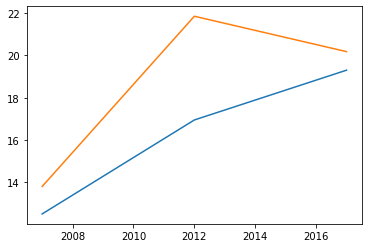

In [89]:
x=[2007,2012,2017]
y1=Abstention_scenario.loc['fin_milieu_milieu'][["abs2007","abs2012","abs2017"]].values
y2=Abstention_scenario.loc['fin_milieu_non'][["abs2007","abs2012","abs2017"]].values
plt.plot(x,y1)
plt.plot(x,y2)
plt.show()

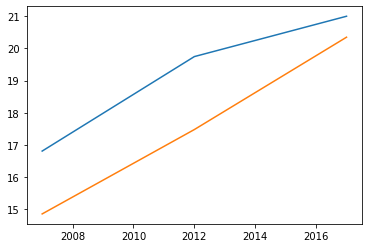

In [90]:
y1=Abstention_scenario.loc['milieu_début_fin'][["abs2007","abs2012","abs2017"]].values
y2=Abstention_scenario.loc['milieu_début_milieu'][["abs2007","abs2012","abs2017"]].values
plt.plot(x,y1)
plt.plot(x,y2)
plt.show()

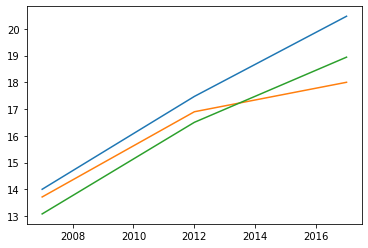

In [91]:
y1=Abstention_scenario.loc['non_fin_milieu'][["abs2007","abs2012","abs2017"]].values
y2=Abstention_scenario.loc['non_fin_fin'][["abs2007","abs2012","abs2017"]].values
y3=Abstention_scenario.loc['non_fin_non'][["abs2007","abs2012","abs2017"]].values
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.show()

In [92]:
df[df['Historique']=='non_fin_milieu'].DEP.unique()

array(['1', '3', '7', '15', '16', '17', '26', '38', '42', '43', '63',
       '69', '73', '74', '78', '79', '85', '86'], dtype=object)

In [93]:
df[df['Historique']=='non_fin_fin'].DEP.unique()

array(['14', '22', '29', '35', '44', '49', '50', '53', '54', '55', '56',
       '57', '61', '72', '84', '85', '87', '88'], dtype=object)

In [94]:
df[df['Historique']=='non_fin_non'].DEP.unique()

array(['9', '11', '12', '30', '31', '32', '34', '46', '48', '65', '66',
       '80', '81', '82'], dtype=object)

# Difference in differences


## fin_milieu_milieu & fin_milieu_non

In [95]:
data = df[(df['Historique'] == 'fin_milieu_milieu')|(df['Historique'] == 'fin_milieu_non')]
data

,key,Inscrits2007,abs2007,Inscrits2012,abs2012,Inscrits2017,abs2017,Groupes,vacances2007,vacances2012,...,salarie15P,salarieTP15P,FPouCDI,CDD,job_commune_resid,job_autredep_meme-reg,job_autrereg,totabst_2007,totabst_2012,totabst_2017
7995,24.1,525,13.90,511,19.569472,468,19.66,CA,fin,milieu,...,65.581395,66.666667,82.978723,9.929078,35.813953,0.000000,12.558140,72.9750,100.0,92.0088
7996,24.2,1293,10.83,1358,16.936672,1301,15.07,CA,fin,milieu,...,84.560907,88.073394,90.284757,6.867672,16.713881,0.566572,1.558074,140.0319,230.0,196.0607
7997,24.4,269,7.06,274,13.868613,262,15.65,CA,fin,milieu,...,77.419355,91.666667,84.166667,14.166667,18.709677,0.645161,4.516129,18.9914,38.0,41.0030
7998,24.5,292,13.01,297,16.498317,302,15.23,CA,fin,milieu,...,73.983740,92.592593,82.417582,10.989011,34.146341,2.439024,0.000000,37.9892,49.0,45.9946
7999,24.6,184,10.33,181,14.917127,186,17.20,CA,fin,milieu,...,74.626866,60.000000,88.000000,8.000000,31.343284,1.492537,7.462687,19.0072,27.0,31.9920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34946,95.676,358,9.78,382,16.753927,382,11.26,CC,fin,milieu,...,84.649123,90.000000,89.119171,6.217617,10.964912,50.438596,4.385965,35.0124,64.0,43.0132
34947,95.678,616,9.25,595,11.932773,593,8.09,CC,fin,milieu,...,80.000000,83.673469,92.605634,4.929577,10.704225,35.211268,2.253521,56.9800,71.0,47.9737
34948,95.680,12079,18.29,13269,30.770970,13213,33.24,CC,fin,milieu,...,93.339316,93.945442,84.659759,9.539579,20.999103,47.591983,0.917340,2209.2491,4083.0,4392.0012
34949,95.682,97,2.06,95,11.578947,120,8.33,CC,fin,milieu,...,85.057471,100.000000,89.189189,9.459459,14.942529,32.183908,1.149425,1.9982,11.0,9.9960


In [96]:
test = data[['key','Historique','abs2007','abs2012','abs2017']]
test = pd.melt(test,
        id_vars=list(test.columns)[:2], value_vars=list(test.columns)[2:],
             var_name='annee', value_name='abstention')
test = test.sort_values(by=['key', 'annee'])
test

,key,Historique,annee,abstention
0,24.1,fin_milieu_milieu,abs2007,13.900000
3569,24.1,fin_milieu_milieu,abs2012,19.569472
7138,24.1,fin_milieu_milieu,abs2017,19.660000
8,24.10,fin_milieu_milieu,abs2007,9.990000
3577,24.10,fin_milieu_milieu,abs2012,11.187439
...,...,...,...,...
6981,95.91,fin_milieu_non,abs2012,21.769212
10550,95.91,fin_milieu_non,abs2017,18.130000
3413,95.94,fin_milieu_non,abs2007,11.600000
6982,95.94,fin_milieu_non,abs2012,16.201117


In [97]:
from numpy.lib.arraysetops import isin
base_did = test[test['annee'].isin(['abs2012','abs2017'])]
base_did['D'] = [1 if i == 'fin_milieu_non' else 0 for i in base_did['Historique']]
base_did['T'] = [1 if i == 'abs2017' else 0 for i in base_did['annee']]
base_did

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,key,Historique,annee,abstention,D,T
3569,24.1,fin_milieu_milieu,abs2012,19.569472,0,0
7138,24.1,fin_milieu_milieu,abs2017,19.660000,0,1
3577,24.10,fin_milieu_milieu,abs2012,11.187439,0,0
7146,24.10,fin_milieu_milieu,abs2017,12.490000,0,1
3654,24.100,fin_milieu_milieu,abs2012,12.935323,0,0
...,...,...,...,...,...,...
10549,95.88,fin_milieu_non,abs2017,22.760000,1,1
6981,95.91,fin_milieu_non,abs2012,21.769212,1,0
10550,95.91,fin_milieu_non,abs2017,18.130000,1,1
6982,95.94,fin_milieu_non,abs2012,16.201117,1,0


In [98]:
import statsmodels.formula.api as smf
model = 'abstention ~ D + T + D * T'

In [99]:
mod = smf.ols(formula = model, data = base_did)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             abstention   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     316.1
Date:                Wed, 11 May 2022   Prob (F-statistic):          1.13e-192
Time:                        15:05:14   Log-Likelihood:                -20211.
No. Observations:                7138   AIC:                         4.043e+04
Df Residuals:                    7134   BIC:                         4.046e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.3192      0.087    165.464      0.0

In [100]:
base_test_tc = test[test['annee'].isin(['abs2012','abs2007'])]
base_test_tc['D'] = [1 if i == 'fin_milieu_non' else 0 for i in base_test_tc['Historique']]
base_test_tc['T'] = [1 if i == 'abs2012' else 0 for i in base_test_tc['annee']]
base_test_tc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,key,Historique,annee,abstention,D,T
0,24.1,fin_milieu_milieu,abs2007,13.900000,0,0
3569,24.1,fin_milieu_milieu,abs2012,19.569472,0,1
8,24.10,fin_milieu_milieu,abs2007,9.990000,0,0
3577,24.10,fin_milieu_milieu,abs2012,11.187439,0,1
85,24.100,fin_milieu_milieu,abs2007,11.310000,0,0
...,...,...,...,...,...,...
6980,95.88,fin_milieu_non,abs2012,25.295508,1,1
3412,95.91,fin_milieu_non,abs2007,11.290000,1,0
6981,95.91,fin_milieu_non,abs2012,21.769212,1,1
3413,95.94,fin_milieu_non,abs2007,11.600000,1,0


In [101]:
mod = smf.ols(formula = model, data = base_test_tc)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             abstention   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     1194.
Date:                Wed, 11 May 2022   Prob (F-statistic):               0.00
Time:                        15:05:23   Log-Likelihood:                -19399.
No. Observations:                7138   AIC:                         3.881e+04
Df Residuals:                    7134   BIC:                         3.883e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.1954      0.077    144.961      0.0

## milieu_début_fin & milieu_début_milieu

In [102]:
data = df[(df['Historique'] == 'milieu_début_fin')|(df['Historique'] == 'milieu_début_milieu')]
data

,key,Inscrits2007,abs2007,Inscrits2012,abs2012,Inscrits2017,abs2017,Groupes,vacances2007,vacances2012,...,salarie15P,salarieTP15P,FPouCDI,CDD,job_commune_resid,job_autredep_meme-reg,job_autrereg,totabst_2007,totabst_2012,totabst_2017
408,2.1,365,18.90,386,19.689119,393,19.85,BB,milieu,début,...,88.000000,90.625000,83.522727,8.522727,16.000000,25.000000,5.000000,68.9850,76.0,78.0105
409,2.2,382,9.16,392,10.969388,404,14.85,BB,milieu,début,...,87.391304,88.571429,89.552239,3.980100,13.478261,3.043478,4.347826,34.9912,43.0,59.9940
410,2.3,754,15.52,787,19.313850,799,18.77,BB,milieu,début,...,88.970588,92.000000,85.674931,8.539945,16.666667,2.450980,10.539216,117.0208,152.0,149.9723
411,2.4,156,14.10,158,13.924051,144,13.89,BB,milieu,début,...,78.787879,91.666667,84.615385,5.769231,21.212121,0.000000,7.575758,21.9960,22.0,20.0016
412,2.5,270,12.96,313,13.738019,333,18.62,BB,milieu,début,...,88.586957,90.697674,87.730061,7.361963,14.673913,1.086957,68.478261,34.9920,43.0,62.0046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34422,90.80,265,10.19,297,11.111111,351,14.25,BA,milieu,début,...,93.063584,94.285714,88.198758,6.211180,15.028902,16.184971,9.826590,27.0035,33.0,50.0175
34423,90.81,592,16.72,603,19.237148,619,22.46,BA,milieu,début,...,91.315789,95.522388,87.896254,6.628242,9.736842,7.368421,25.263158,98.9824,116.0,139.0274
34424,90.82,186,11.29,229,10.480349,230,18.26,BA,milieu,début,...,81.428571,83.333333,83.333333,7.894737,10.000000,12.142857,12.142857,20.9994,24.0,41.9980
34425,90.83,58,3.45,75,8.000000,78,8.97,BA,milieu,début,...,80.952381,60.000000,85.294118,8.823529,16.666667,9.523810,4.761905,2.0010,6.0,6.9966


In [103]:
test = data[['key','Historique','abs2007','abs2012','abs2017']]
test = pd.melt(test,
        id_vars=list(test.columns)[:2], value_vars=list(test.columns)[2:],
             var_name='annee', value_name='abstention')
test = test.sort_values(by=['key', 'annee'])
test

,key,Historique,annee,abstention
1793,10.10,milieu_début_fin,abs2007,15.790000
16926,10.10,milieu_début_fin,abs2012,10.256410
32059,10.10,milieu_début_fin,abs2017,14.630000
1880,10.100,milieu_début_fin,abs2007,12.220000
17013,10.100,milieu_début_fin,abs2012,11.038108
...,...,...,...,...
30265,90.84,milieu_début_milieu,abs2012,14.840989
45398,90.84,milieu_début_milieu,abs2017,16.070000
15059,90.9,milieu_début_milieu,abs2007,18.160000
30192,90.9,milieu_début_milieu,abs2012,22.561786


In [104]:
base_did = test[test['annee'].isin(['abs2012','abs2017'])]
base_did['D'] = [1 if i == 'milieu_début_fin' else 0 for i in base_did['Historique']]
base_did['T'] = [1 if i == 'abs2017' else 0 for i in base_did['annee']]
base_did

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,key,Historique,annee,abstention,D,T
16926,10.10,milieu_début_fin,abs2012,10.256410,1,0
32059,10.10,milieu_début_fin,abs2017,14.630000,1,1
17013,10.100,milieu_début_fin,abs2012,11.038108,1,0
32146,10.100,milieu_début_fin,abs2017,17.040000,1,1
17014,10.101,milieu_début_fin,abs2012,13.821138,1,0
...,...,...,...,...,...,...
45397,90.83,milieu_début_milieu,abs2017,8.970000,0,1
30265,90.84,milieu_début_milieu,abs2012,14.840989,0,0
45398,90.84,milieu_début_milieu,abs2017,16.070000,0,1
30192,90.9,milieu_début_milieu,abs2012,22.561786,0,0


In [105]:
import statsmodels.formula.api as smf
model = 'abstention ~ D + T + D * T'

In [106]:
mod = smf.ols(formula = model, data = base_did)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             abstention   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     268.9
Date:                Wed, 11 May 2022   Prob (F-statistic):          3.11e-172
Time:                        15:05:47   Log-Likelihood:                -89256.
No. Observations:               30266   AIC:                         1.785e+05
Df Residuals:                   30262   BIC:                         1.786e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.8945      0.069    215.830      0.0

In [107]:
base_test_tc = test[test['annee'].isin(['abs2012','abs2007'])]
base_test_tc['D'] = [1 if i == 'milieu_début_fin' else 0 for i in base_test_tc['Historique']]
base_test_tc['T'] = [1 if i == 'abs2012' else 0 for i in base_test_tc['annee']]
base_test_tc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,key,Historique,annee,abstention,D,T
1793,10.10,milieu_début_fin,abs2007,15.790000,1,0
16926,10.10,milieu_début_fin,abs2012,10.256410,1,1
1880,10.100,milieu_début_fin,abs2007,12.220000,1,0
17013,10.100,milieu_début_fin,abs2012,11.038108,1,1
1881,10.101,milieu_début_fin,abs2007,9.350000,1,0
...,...,...,...,...,...,...
30264,90.83,milieu_début_milieu,abs2012,8.000000,0,1
15132,90.84,milieu_début_milieu,abs2007,14.660000,0,0
30265,90.84,milieu_début_milieu,abs2012,14.840989,0,1
15059,90.9,milieu_début_milieu,abs2007,18.160000,0,0


In [108]:
mod = smf.ols(formula = model, data = base_test_tc)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             abstention   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     527.8
Date:                Wed, 11 May 2022   Prob (F-statistic):               0.00
Time:                        15:05:56   Log-Likelihood:                -87164.
No. Observations:               30266   AIC:                         1.743e+05
Df Residuals:                   30262   BIC:                         1.744e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.1284      0.064    203.852      0.0

## non_fin_milieu, non_fin_fin, non_fin_non

In [116]:
data = df[(df['Historique'] == 'non_fin_fin')|(df['Historique'] == 'non_fin_milieu')]
data

,key,Inscrits2007,abs2007,Inscrits2012,abs2012,Inscrits2017,abs2017,Groupes,vacances2007,vacances2012,...,salarie15P,salarieTP15P,FPouCDI,CDD,job_commune_resid,job_autredep_meme-reg,job_autrereg,totabst_2007,totabst_2012,totabst_2017
0,1.1,596,11.41,592,14.189189,598,15.38,AA,non,fin,...,85.276074,91.525424,90.647482,5.755396,14.417178,25.766871,4.601227,68.0036,84.0,91.9724
1,1.2,205,14.15,215,16.744186,209,11.96,AA,non,fin,...,83.333333,87.500000,87.777778,8.888889,11.111111,25.925926,1.851852,29.0075,36.0,24.9964
2,1.4,8106,18.84,8205,20.694698,8586,22.85,AA,non,fin,...,92.116612,89.455782,83.501873,10.898876,41.210971,18.147318,0.948767,1527.1704,1698.0,1961.9010
3,1.5,1051,12.94,1152,14.756944,1172,18.34,AA,non,fin,...,86.155748,94.957983,88.809182,5.595409,15.945612,48.454883,1.854141,135.9994,170.0,214.9448
4,1.6,112,10.71,105,16.190476,99,20.20,AA,non,fin,...,96.226415,100.000000,84.313725,11.764706,7.547170,32.075472,0.000000,11.9952,17.0,19.9980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33893,88.508,368,13.04,364,14.560440,374,11.76,AB,non,fin,...,89.637306,91.176471,83.236994,7.514451,16.580311,3.108808,1.554404,47.9872,53.0,43.9824
33894,88.509,99,8.08,98,13.265306,94,10.64,AB,non,fin,...,86.206897,80.000000,92.000000,6.000000,13.793103,8.620690,0.000000,7.9992,13.0,10.0016
33895,88.510,172,15.70,166,18.072289,154,27.27,AB,non,fin,...,89.090909,100.000000,87.755102,8.163265,9.090909,0.000000,12.727273,27.0040,30.0,41.9958
33896,88.511,95,12.63,82,24.390244,75,22.67,AB,non,fin,...,82.142857,100.000000,78.260870,4.347826,10.714286,7.142857,7.142857,11.9985,20.0,17.0025


In [117]:
test = data[['key','Historique','abs2007','abs2012','abs2017']]
test = pd.melt(test,
        id_vars=list(test.columns)[:2], value_vars=list(test.columns)[2:],
             var_name='annee', value_name='abstention')
test = test.sort_values(by=['key', 'annee'])
test

,key,Historique,annee,abstention
0,1.1,non_fin_milieu,abs2007,11.410000
11762,1.1,non_fin_milieu,abs2012,14.189189
23524,1.1,non_fin_milieu,abs2017,15.380000
8,1.10,non_fin_milieu,abs2007,10.730000
11770,1.10,non_fin_milieu,abs2012,14.537445
...,...,...,...,...
23131,88.98,non_fin_fin,abs2012,15.112994
34893,88.98,non_fin_fin,abs2017,10.300000
11370,88.99,non_fin_fin,abs2007,13.600000
23132,88.99,non_fin_fin,abs2012,16.889238


In [118]:
base_did = test[test['annee'].isin(['abs2012','abs2017'])]
base_did['D'] = [1 if i == 'non_fin_milieu' else 0 for i in base_did['Historique']]
base_did['T'] = [1 if i == 'abs2017' else 0 for i in base_did['annee']]
base_did

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,key,Historique,annee,abstention,D,T
11762,1.1,non_fin_milieu,abs2012,14.189189,1,0
23524,1.1,non_fin_milieu,abs2017,15.380000,1,1
11770,1.10,non_fin_milieu,abs2012,14.537445,1,0
23532,1.10,non_fin_milieu,abs2017,18.430000,1,1
11854,1.100,non_fin_milieu,abs2012,11.290323,1,0
...,...,...,...,...,...,...
34892,88.97,non_fin_fin,abs2017,29.030000,0,1
23131,88.98,non_fin_fin,abs2012,15.112994,0,0
34893,88.98,non_fin_fin,abs2017,10.300000,0,1
23132,88.99,non_fin_fin,abs2012,16.889238,0,0


In [119]:
import statsmodels.formula.api as smf
model = 'abstention ~ D + T + D * T'

In [120]:
mod = smf.ols(formula = model, data = base_did)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             abstention   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     554.7
Date:                Wed, 11 May 2022   Prob (F-statistic):               0.00
Time:                        15:19:53   Log-Likelihood:                -67907.
No. Observations:               23524   AIC:                         1.358e+05
Df Residuals:                   23520   BIC:                         1.359e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.7593      0.055    268.662      0.0

In [121]:
base_test_tc = test[test['annee'].isin(['abs2012','abs2007'])]
base_test_tc['D'] = [1 if i == 'non_fin_milieu' else 0 for i in base_test_tc['Historique']]
base_test_tc['T'] = [1 if i == 'abs2012' else 0 for i in base_test_tc['annee']]
base_test_tc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,key,Historique,annee,abstention,D,T
0,1.1,non_fin_milieu,abs2007,11.410000,1,0
11762,1.1,non_fin_milieu,abs2012,14.189189,1,1
8,1.10,non_fin_milieu,abs2007,10.730000,1,0
11770,1.10,non_fin_milieu,abs2012,14.537445,1,1
92,1.100,non_fin_milieu,abs2007,11.540000,1,0
...,...,...,...,...,...,...
23130,88.97,non_fin_fin,abs2012,9.375000,0,1
11369,88.98,non_fin_fin,abs2007,13.370000,0,0
23131,88.98,non_fin_fin,abs2012,15.112994,0,1
11370,88.99,non_fin_fin,abs2007,13.600000,0,0


In [122]:
mod = smf.ols(formula = model, data = base_test_tc)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             abstention   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     772.5
Date:                Wed, 11 May 2022   Prob (F-statistic):               0.00
Time:                        15:20:43   Log-Likelihood:                -66015.
No. Observations:               23524   AIC:                         1.320e+05
Df Residuals:                   23520   BIC:                         1.321e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3722      0.051    244.077      0.0

## non_fin_fin, non_fin_non

In [130]:
data = df[(df['Historique'] == 'non_fin_fin')|(df['Historique'] == 'non_fin_non')]
data

,key,Inscrits2007,abs2007,Inscrits2012,abs2012,Inscrits2017,abs2017,Groupes,vacances2007,vacances2012,...,salarie15P,salarieTP15P,FPouCDI,CDD,job_commune_resid,job_autredep_meme-reg,job_autrereg,totabst_2007,totabst_2012,totabst_2017
2849,9.1,54,3.70,48,10.416667,53,5.66,AC,non,fin,...,58.823529,75.000000,100.000000,0.000000,29.411765,17.647059,0.000000,1.9980,5.0,2.9998
2850,9.2,379,9.23,419,13.126492,470,15.74,AC,non,fin,...,77.459016,81.818182,85.185185,12.698413,12.295082,2.868852,4.508197,34.9817,55.0,73.9780
2851,9.3,334,9.28,332,13.554217,355,19.15,AC,non,fin,...,80.991736,92.857143,87.755102,8.163265,19.008264,2.479339,1.652893,30.9952,45.0,67.9825
2852,9.4,134,12.69,125,9.600000,119,13.45,AC,non,fin,...,75.000000,100.000000,90.909091,9.090909,15.909091,6.818182,6.818182,17.0046,12.0,16.0055
2853,9.5,189,12.70,174,24.712644,154,16.23,AC,non,fin,...,43.181818,50.000000,84.210526,10.526316,56.818182,6.818182,0.000000,24.0030,43.0,24.9942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33893,88.508,368,13.04,364,14.560440,374,11.76,AB,non,fin,...,89.637306,91.176471,83.236994,7.514451,16.580311,3.108808,1.554404,47.9872,53.0,43.9824
33894,88.509,99,8.08,98,13.265306,94,10.64,AB,non,fin,...,86.206897,80.000000,92.000000,6.000000,13.793103,8.620690,0.000000,7.9992,13.0,10.0016
33895,88.510,172,15.70,166,18.072289,154,27.27,AB,non,fin,...,89.090909,100.000000,87.755102,8.163265,9.090909,0.000000,12.727273,27.0040,30.0,41.9958
33896,88.511,95,12.63,82,24.390244,75,22.67,AB,non,fin,...,82.142857,100.000000,78.260870,4.347826,10.714286,7.142857,7.142857,11.9985,20.0,17.0025


In [131]:
test = data[['key','Historique','abs2007','abs2012','abs2017']]
test = pd.melt(test,
        id_vars=list(test.columns)[:2], value_vars=list(test.columns)[2:],
             var_name='annee', value_name='abstention')
test = test.sort_values(by=['key', 'annee'])
test

,key,Historique,annee,abstention
331,11.1,non_fin_non,abs2007,11.530000
11059,11.1,non_fin_non,abs2012,13.486005
21787,11.1,non_fin_non,abs2017,16.980000
340,11.10,non_fin_non,abs2007,18.930000
11068,11.10,non_fin_non,abs2012,23.412698
...,...,...,...,...
10823,9.98,non_fin_non,abs2012,16.049383
21551,9.98,non_fin_non,abs2017,19.540000
96,9.99,non_fin_non,abs2007,6.340000
10824,9.99,non_fin_non,abs2012,11.904762


In [132]:
base_did = test[test['annee'].isin(['abs2012','abs2017'])]
base_did['D'] = [1 if i == 'non_fin_fin' else 0 for i in base_did['Historique']]
base_did['T'] = [1 if i == 'abs2017' else 0 for i in base_did['annee']]
base_did

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,key,Historique,annee,abstention,D,T
11059,11.1,non_fin_non,abs2012,13.486005,0,0
21787,11.1,non_fin_non,abs2017,16.980000,0,1
11068,11.10,non_fin_non,abs2012,23.412698,0,0
21796,11.10,non_fin_non,abs2017,17.240000,0,1
11157,11.100,non_fin_non,abs2012,28.571429,0,0
...,...,...,...,...,...,...
21550,9.97,non_fin_non,abs2017,17.390000,0,1
10823,9.98,non_fin_non,abs2012,16.049383,0,0
21551,9.98,non_fin_non,abs2017,19.540000,0,1
10824,9.99,non_fin_non,abs2012,11.904762,0,0


In [133]:
import statsmodels.formula.api as smf
model = 'abstention ~ D + T + D * T'

In [134]:
mod = smf.ols(formula = model, data = base_did)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             abstention   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     200.8
Date:                Wed, 11 May 2022   Prob (F-statistic):          1.96e-128
Time:                        15:48:29   Log-Likelihood:                -62963.
No. Observations:               21456   AIC:                         1.259e+05
Df Residuals:                   21452   BIC:                         1.260e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.0744      0.068    207.088      0.0

In [128]:
base_test_tc = test[test['annee'].isin(['abs2012','abs2007'])]
base_test_tc['D'] = [1 if i == 'non_fin_non' else 0 for i in base_test_tc['Historique']]
base_test_tc['T'] = [1 if i == 'abs2012' else 0 for i in base_test_tc['annee']]
base_test_tc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,key,Historique,annee,abstention,D,T
331,11.1,non_fin_non,abs2007,11.530000,1,0
11059,11.1,non_fin_non,abs2012,13.486005,1,1
340,11.10,non_fin_non,abs2007,18.930000,1,0
11068,11.10,non_fin_non,abs2012,23.412698,1,1
429,11.100,non_fin_non,abs2007,22.220000,1,0
...,...,...,...,...,...,...
10822,9.97,non_fin_non,abs2012,14.084507,1,1
95,9.98,non_fin_non,abs2007,19.630000,1,0
10823,9.98,non_fin_non,abs2012,16.049383,1,1
96,9.99,non_fin_non,abs2007,6.340000,1,0


In [129]:
mod = smf.ols(formula = model, data = base_test_tc)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             abstention   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     625.0
Date:                Wed, 11 May 2022   Prob (F-statistic):               0.00
Time:                        15:25:25   Log-Likelihood:                -61308.
No. Observations:               21456   AIC:                         1.226e+05
Df Residuals:                   21452   BIC:                         1.227e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3722      0.053    231.914      0.0